# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Load Dataset

In [2]:
df = pd.read_csv('ecommerce_sales_34500.csv')
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female


### Explore The Dataset

In [3]:
df.shape

(34500, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34500 entries, 0 to 34499
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            34500 non-null  object 
 1   customer_id         34500 non-null  object 
 2   product_id          34500 non-null  object 
 3   category            34500 non-null  object 
 4   price               34500 non-null  float64
 5   discount            34500 non-null  float64
 6   quantity            34500 non-null  int64  
 7   payment_method      34500 non-null  object 
 8   order_date          34500 non-null  object 
 9   delivery_time_days  34500 non-null  int64  
 10  region              34500 non-null  object 
 11  returned            34500 non-null  object 
 12  total_amount        34500 non-null  float64
 13  shipping_cost       34500 non-null  float64
 14  profit_margin       34500 non-null  float64
 15  customer_age        34500 non-null  int64  
 16  cust

In [5]:
df.describe(include='all')

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
count,34500,34500,34500,34500,34500.000000,34500.000000,34500.000000,34500,34500,34500.000000,34500,34500,34500.000000,34500.000000,34500.000000,34500.000000,34500
unique,34500,7903,24912,7,NaN,NaN,NaN,6,731,NaN,5,2,NaN,NaN,NaN,NaN,3
top,O100000,C11573,P200645,Fashion,NaN,NaN,NaN,Credit Card,2024-12-04,NaN,South,No,NaN,NaN,NaN,NaN,Female
freq,1,13,7,6254,NaN,NaN,NaN,12170,70,NaN,7584,32597,NaN,NaN,NaN,NaN,16818
mean,NaN,NaN,NaN,NaN,119.391632,0.049291,1.490725,NaN,NaN,4.814203,NaN,NaN,170.008494,6.152120,28.116505,43.474377,NaN
std,NaN,NaN,NaN,NaN,195.620477,0.069894,0.932270,NaN,NaN,1.242141,NaN,NaN,357.503014,2.389539,53.352947,14.980682,NaN
min,NaN,NaN,NaN,NaN,1.010000,0.000000,1.000000,NaN,NaN,3.000000,NaN,NaN,0.820000,0.000000,-6.200000,18.000000,NaN
25%,NaN,NaN,NaN,NaN,16.690000,0.000000,1.000000,NaN,NaN,4.000000,NaN,NaN,19.710000,4.420000,1.500000,31.000000,NaN
50%,NaN,NaN,NaN,NaN,45.660000,0.000000,1.000000,NaN,NaN,5.000000,NaN,NaN,56.820000,6.090000,10.550000,43.000000,NaN
75%,NaN,NaN,NaN,NaN,130.950000,0.100000,2.000000,NaN,NaN,6.000000,NaN,NaN,168.530000,7.830000,33.132500,56.000000,NaN


In [6]:
df.nunique()

order_id              34500
customer_id            7903
product_id            24912
category                  7
price                 17274
discount                  6
quantity                  5
payment_method            6
order_date              731
delivery_time_days       10
region                    5
returned                  2
total_amount          18800
shipping_cost          1304
profit_margin          9603
customer_age             52
customer_gender           3
dtype: int64

## Exploratory Data Analysis

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

In [10]:
df.isna().sum()

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.fillna(0, inplace=True)
df

,order_id,customer_id,product_id,category,price,discount,quantity,payment_method,order_date,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender
0,O100000,C17270,P234890,Home,164.08,0.15,1,Credit Card,2023-12-23,4,West,No,139.47,7.88,31.17,60,Female
1,O100001,C17603,P228204,Grocery,24.73,0.00,1,Credit Card,2025-04-03,6,South,No,24.73,4.60,-2.62,37,Male
2,O100002,C10860,P213892,Electronics,175.58,0.05,1,Credit Card,2024-10-08,4,North,No,166.80,6.58,13.44,34,Male
3,O100003,C15390,P208689,Electronics,63.67,0.00,1,UPI,2024-09-14,6,South,No,63.67,5.50,2.14,21,Female
4,O100004,C15226,P228063,Home,16.33,0.15,1,COD,2024-12-21,6,East,No,13.88,2.74,1.15,39,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,O134495,C13553,P231412,Fashion,10.44,0.20,1,Debit Card,2025-08-13,3,North,No,8.35,3.04,-0.12,23,Female
34496,O134496,C11349,P218266,Beauty,4.79,0.10,5,Debit Card,2023-12-04,6,South,Yes,21.56,3.37,6.33,61,Female
34497,O134497,C12986,P204345,Electronics,323.64,0.00,5,Credit Card,2025-02-01,6,East,No,1618.20,12.18,182.00,41,Female
34498,O134498,C17196,P217644,Home,23.09,0.05,1,Credit Card,2024-03-27,6,East,No,21.94,5.61,0.53,27,Female


In [13]:
num_cols = ['price', 'discount', 'quantity', 'delivery_time_days', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age']
cat_cols = ['category', 'payment_method', 'region', 'returned', 'customer_gender']

print(len(num_cols))
print(len(cat_cols))

8
5


In [42]:
colors = ['#27708C', '#539DA6', '#75BFB8', '#F2F2F2', '#89D9CA', '#357C8C', '#175973', '#152623']

## Visualization

### 1. Histogram Of Num_Cols

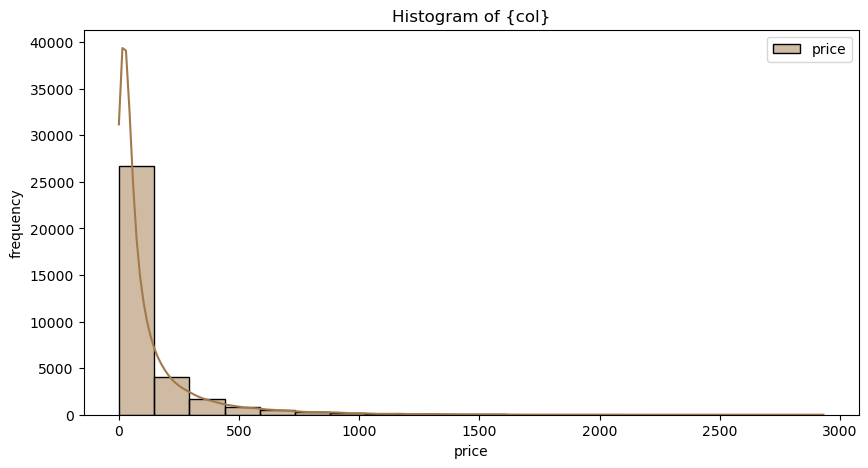

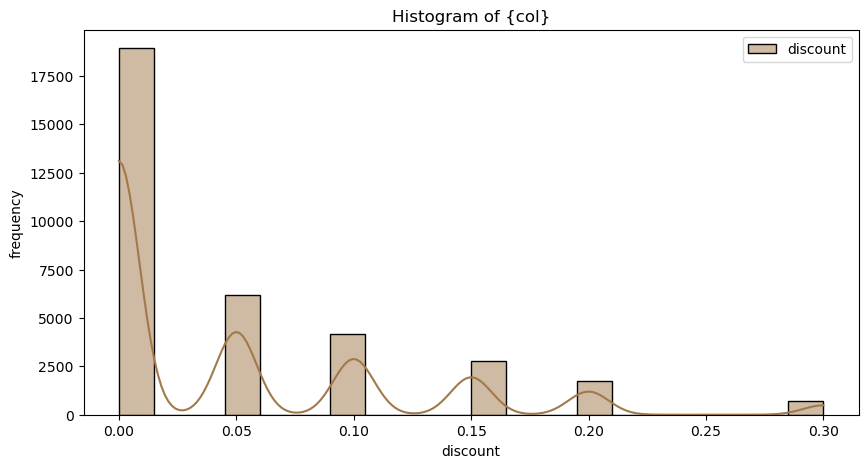

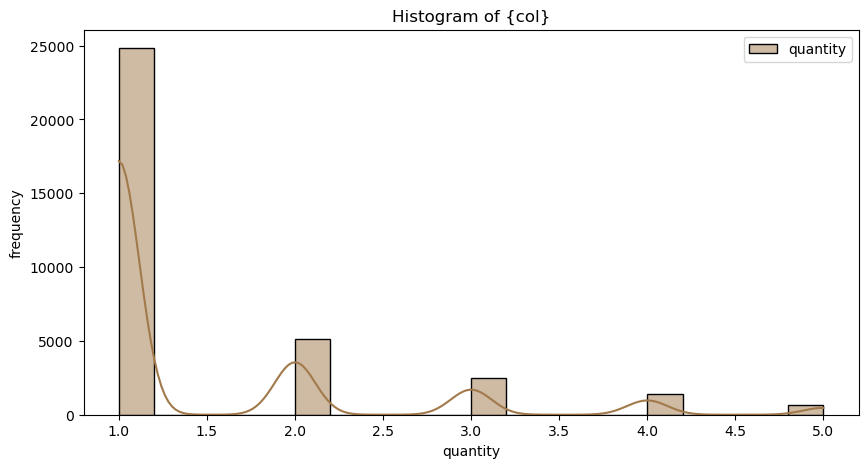

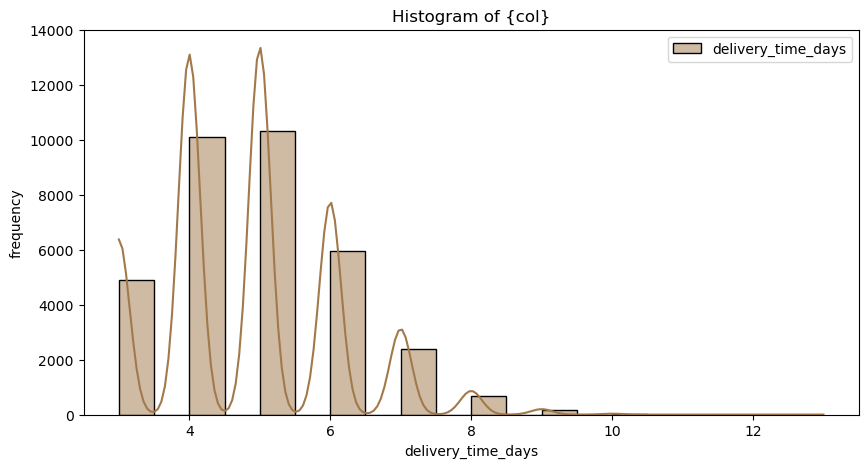

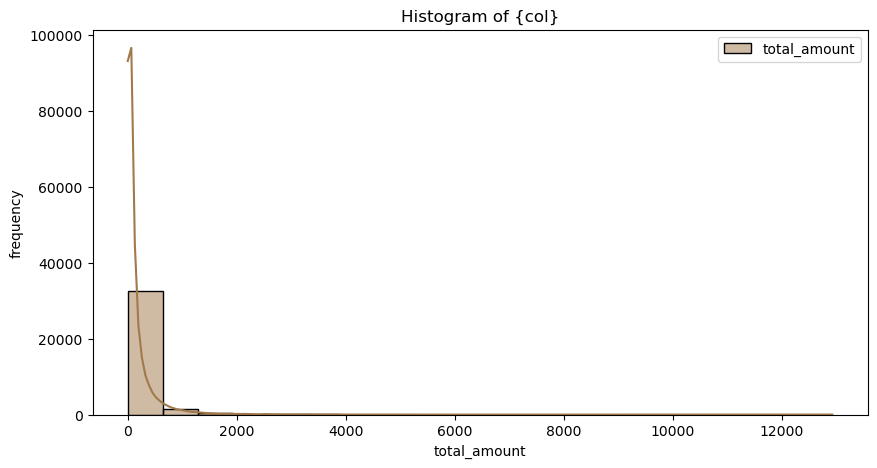

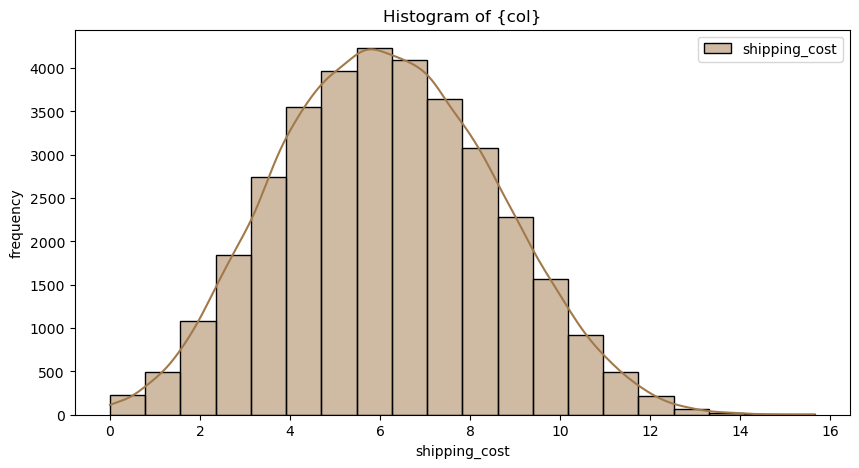

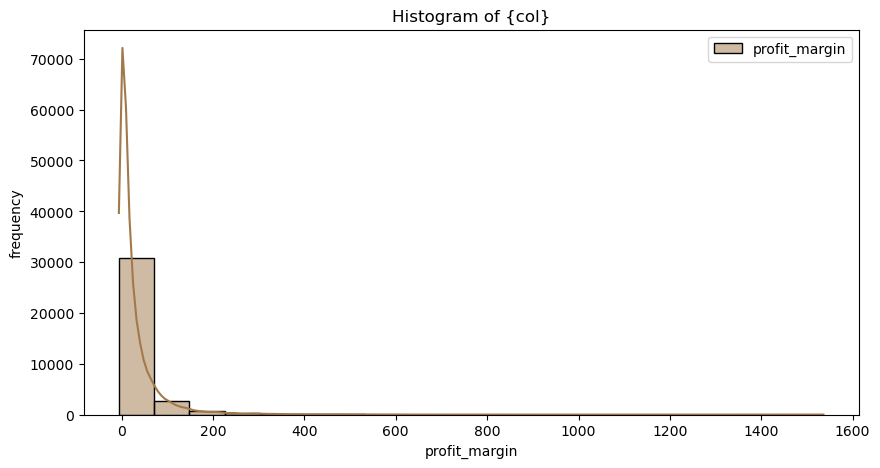

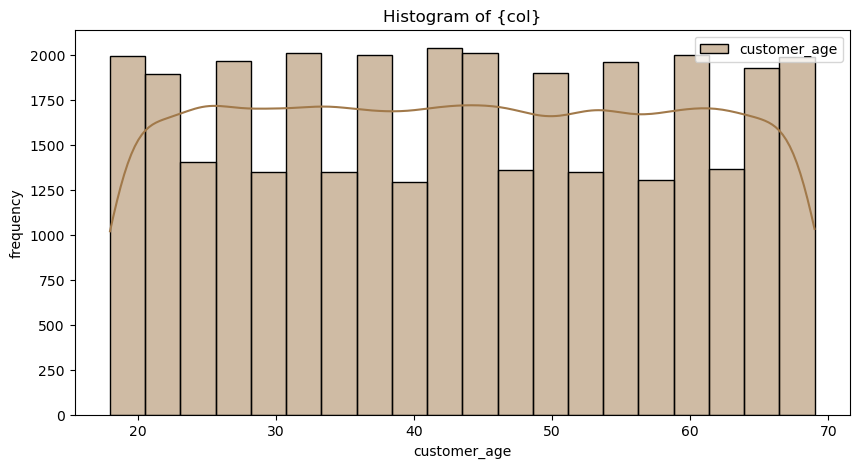

In [24]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[[col]], kde=True, palette='cubehelix', bins=20)
    plt.title('Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.tight_layout
    plt.show()

### 2. Countplot Of Cat_Cols

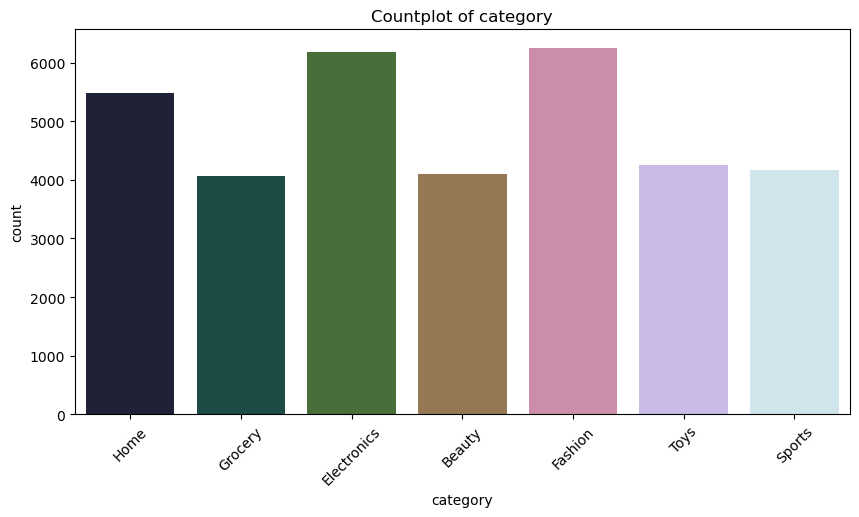

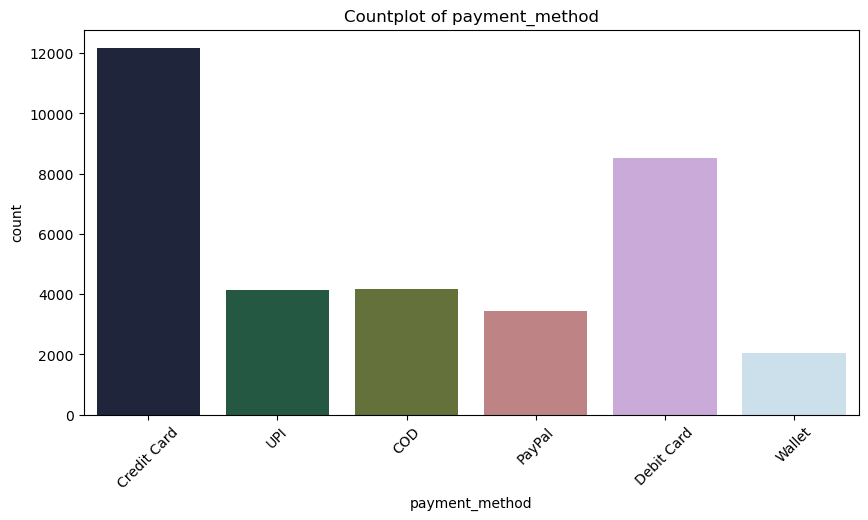

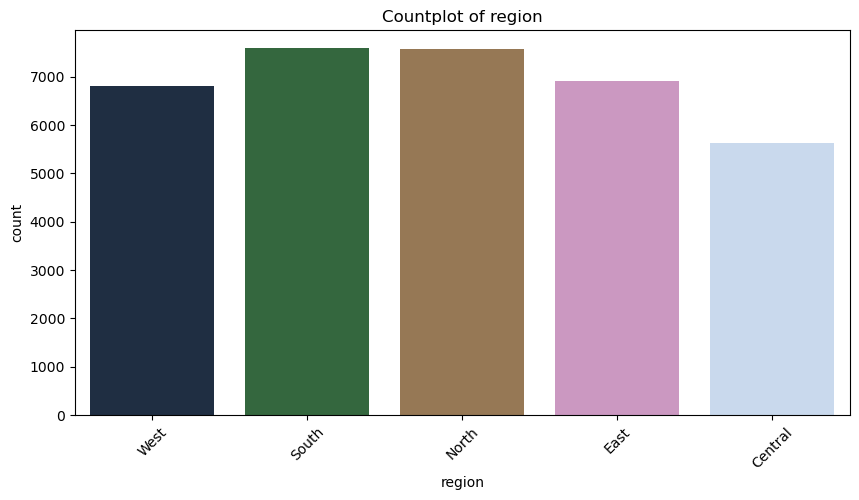

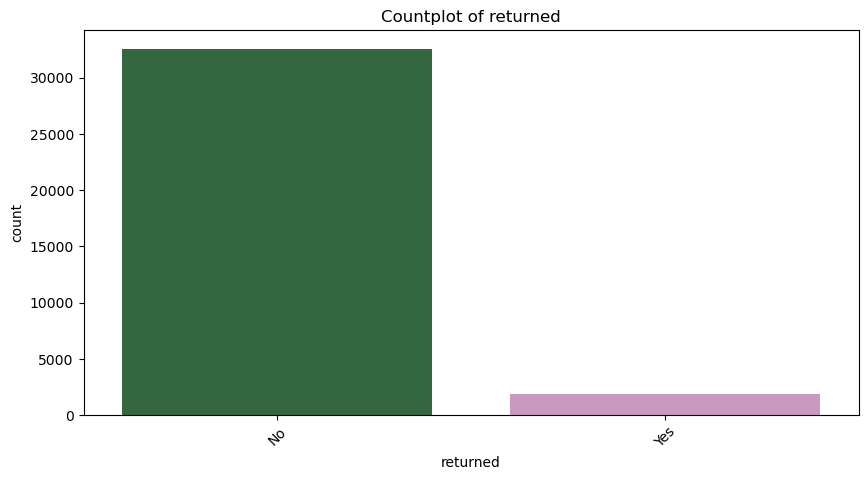

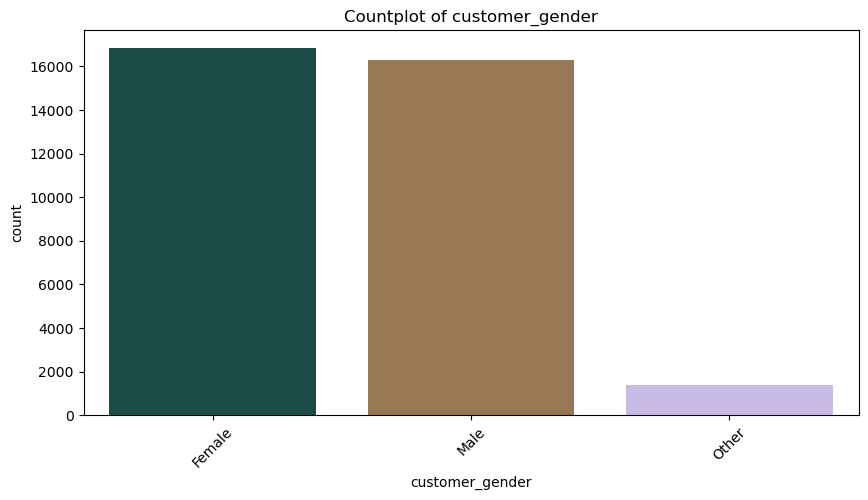

In [25]:
for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, palette='cubehelix')
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=45)
    plt.tight_layout
    plt.show()

### 3. Total Amount vs Price by Returned

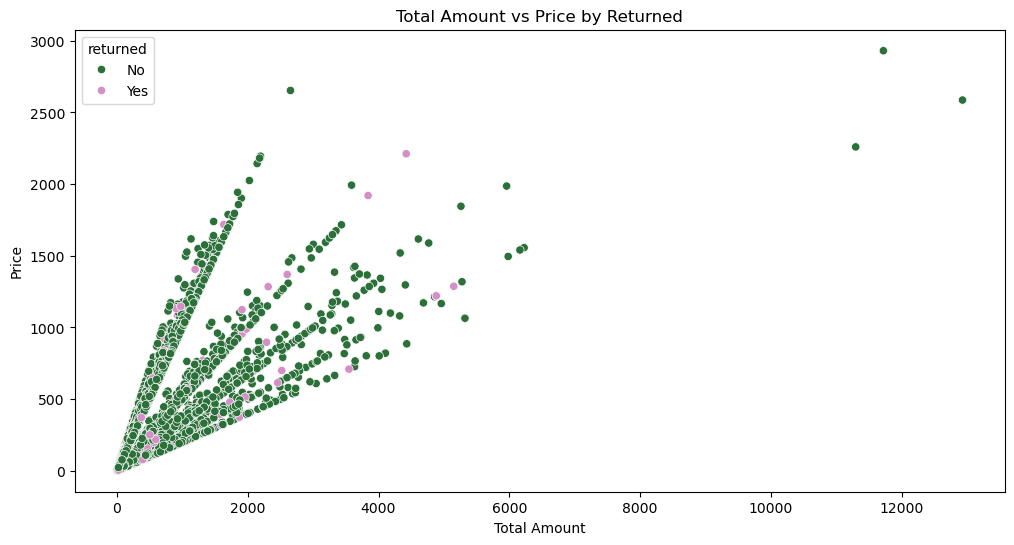

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df['total_amount'], y=df['price'], hue=df['returned'], palette='cubehelix')
plt.title('Total Amount vs Price by Returned')
plt.xlabel('Total Amount')
plt.ylabel('Price')
plt.show()

### 4. Category by Profit Margin

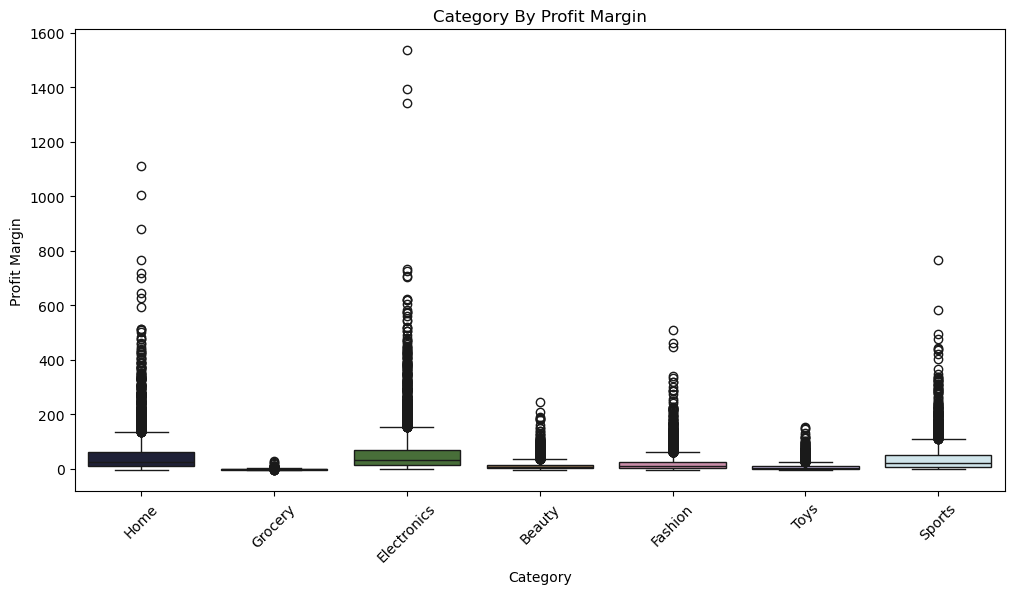

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['category'], y=df['profit_margin'], data=df, palette='cubehelix')
plt.title('Category By Profit Margin')
plt.xlabel('Category')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45)
plt.show()

### 5. Quantity Sold By Order Date

In [36]:
df['month'] = df['order_date'].dt.month_name()
df['month']

0         December
1            April
2          October
3        September
4         December
           ...    
34495       August
34496     December
34497     February
34498        March
34499    September
Name: month, Length: 34500, dtype: object

In [37]:
df['week'] = df['order_date'].dt.day_name()
df['week']

0         Saturday
1         Thursday
2          Tuesday
3         Saturday
4         Saturday
           ...    
34495    Wednesday
34496       Monday
34497     Saturday
34498    Wednesday
34499     Thursday
Name: week, Length: 34500, dtype: object

#### 5.1. Sales By Weekday

In [39]:
weekday_quantity = df.groupby('week')['price'].sum()

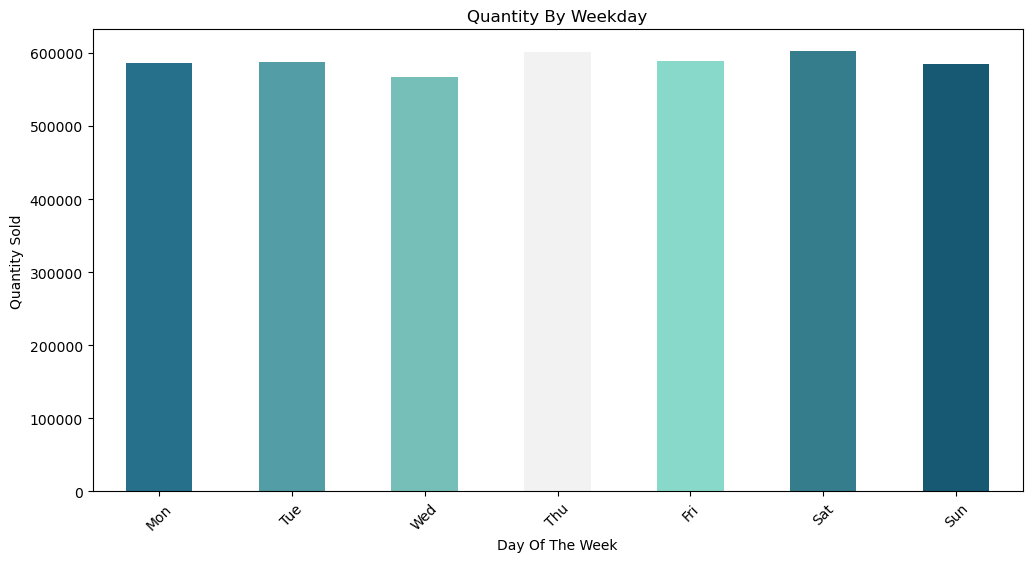

In [43]:
weekday_quantity.plot(kind='bar', color=colors, figsize=(12, 6))
plt.title('Quantity By Weekday')
plt.xlabel('Day Of The Week')
plt.ylabel('Quantity Sold')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()

#### 5.2. Sales By Month

In [44]:
monthly_quantity = df.groupby('month')['price'].sum()

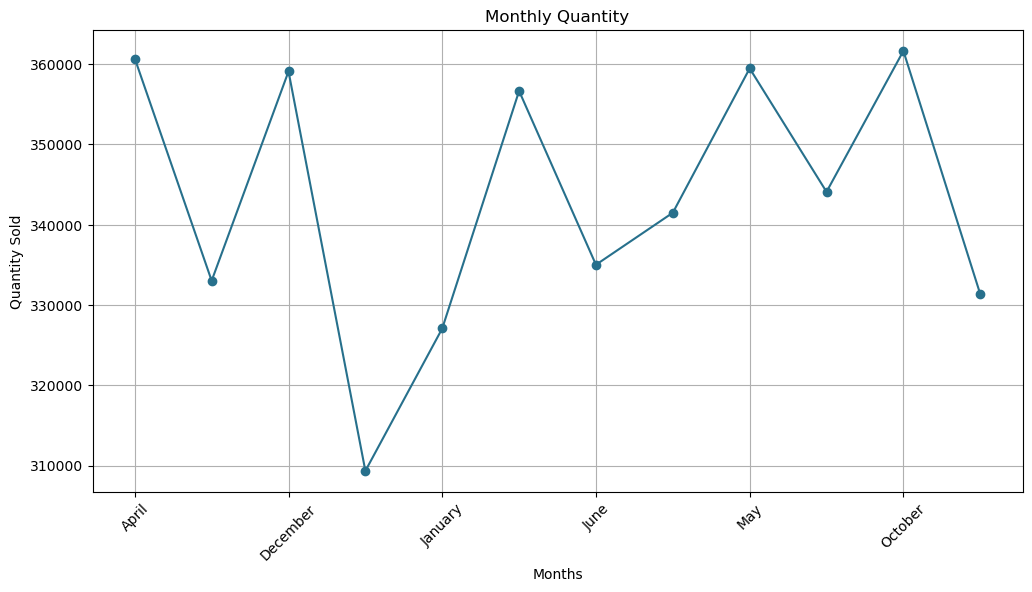

In [45]:
monthly_quantity.plot(kind='line', marker='o', color=colors, figsize=(12, 6))
plt.title('Monthly Quantity')
plt.xlabel('Months')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 6. Profit Margins By Region

In [48]:
margin_by_region = df.groupby('region')['profit_margin'].sum().sort_values(ascending=False)
margin_by_region

region
South      211081.17
North      208493.58
West       197385.73
East       195035.24
Central    158023.69
Name: profit_margin, dtype: float64

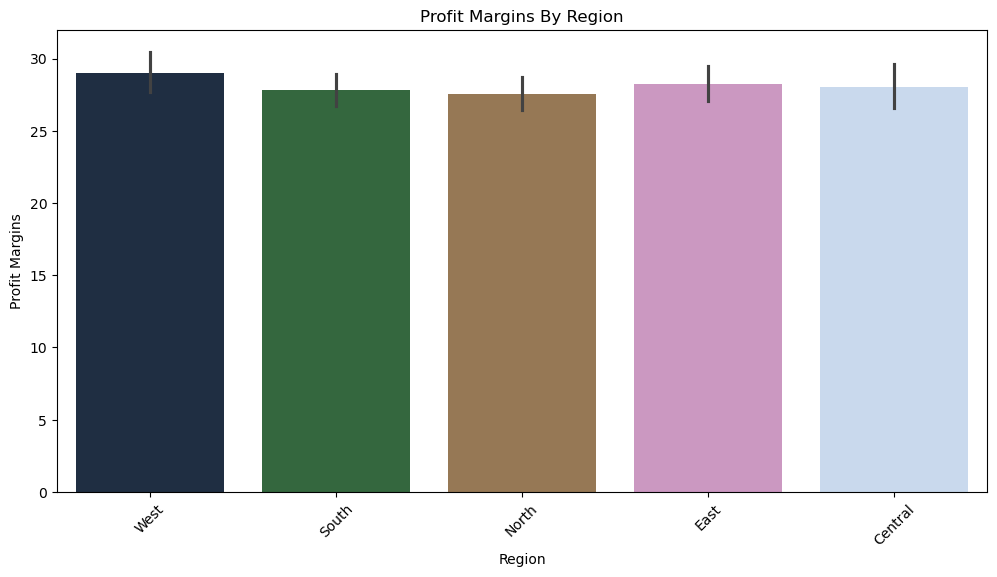

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['region'], y=df['profit_margin'], palette='cubehelix')
plt.title('Profit Margins By Region')
plt.xlabel('Region')
plt.ylabel('Profit Margins')
plt.xticks(rotation=45)
plt.show()

### 7. Customer Gender

In [51]:
customer_gender = df['customer_gender'].value_counts()

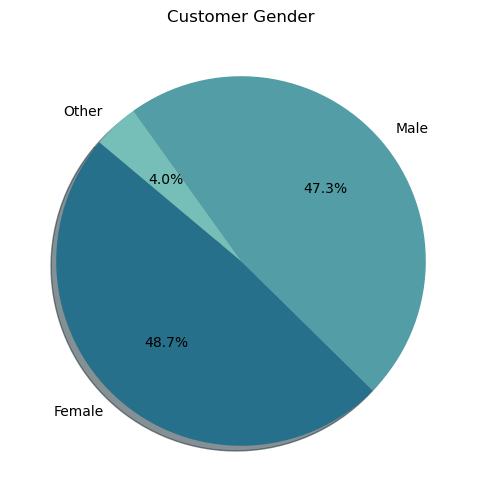

In [63]:
plt.figure(figsize=(12, 6))
plt.pie(customer_gender, labels=customer_gender.index, autopct='%1.1f%%', startangle=140, colors=colors, shadow=True)
plt.title('Customer Gender')
plt.show()

### 8. Total Amount vs Price

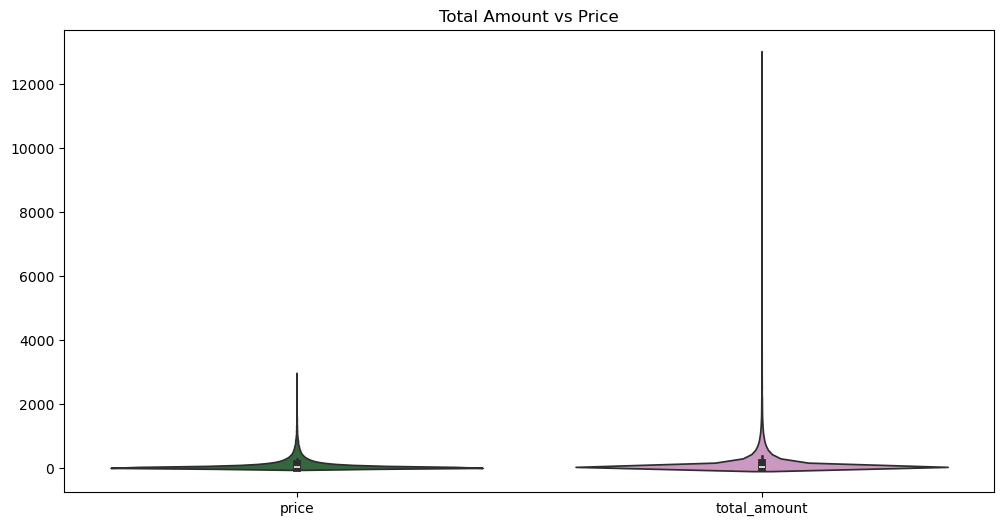

In [66]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['price','total_amount']], palette='cubehelix')
plt.title('Total Amount vs Price')
plt.show()

## Predictive Modeling

In [68]:
df = df.drop(['order_id'], axis=1)

In [69]:
df = df.drop(['customer_id'], axis=1)

In [70]:
df = df.drop(['product_id'], axis=1)

In [71]:
df = df.drop(['order_date'], axis=1)
df

,category,price,discount,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,month,week
0,Home,164.08,0.15,1,Credit Card,4,West,No,139.47,7.88,31.17,60,Female,December,Saturday
1,Grocery,24.73,0.00,1,Credit Card,6,South,No,24.73,4.60,-2.62,37,Male,April,Thursday
2,Electronics,175.58,0.05,1,Credit Card,4,North,No,166.80,6.58,13.44,34,Male,October,Tuesday
3,Electronics,63.67,0.00,1,UPI,6,South,No,63.67,5.50,2.14,21,Female,September,Saturday
4,Home,16.33,0.15,1,COD,6,East,No,13.88,2.74,1.15,39,Male,December,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,Fashion,10.44,0.20,1,Debit Card,3,North,No,8.35,3.04,-0.12,23,Female,August,Wednesday
34496,Beauty,4.79,0.10,5,Debit Card,6,South,Yes,21.56,3.37,6.33,61,Female,December,Monday
34497,Electronics,323.64,0.00,5,Credit Card,6,East,No,1618.20,12.18,182.00,41,Female,February,Saturday
34498,Home,23.09,0.05,1,Credit Card,6,East,No,21.94,5.61,0.53,27,Female,March,Wednesday


In [72]:
df['category'].unique()

array(['Home', 'Grocery', 'Electronics', 'Beauty', 'Fashion', 'Toys',
       'Sports'], dtype=object)

In [73]:
df['payment_method'].unique()

array(['Credit Card', 'UPI', 'COD', 'PayPal', 'Debit Card', 'Wallet'],
      dtype=object)

In [74]:
df['region'].unique()

array(['West', 'South', 'North', 'East', 'Central'], dtype=object)

In [75]:
df['customer_gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [76]:
df['month'].unique()

array(['December', 'April', 'October', 'September', 'May', 'February',
       'July', 'November', 'August', 'June', 'March', 'January'],
      dtype=object)

In [77]:
df['week'].unique()

array(['Saturday', 'Thursday', 'Tuesday', 'Sunday', 'Monday', 'Wednesday',
       'Friday'], dtype=object)

In [78]:
df['returned'].unique()

array(['No', 'Yes'], dtype=object)

In [79]:
val = {'category': {'Home': 0, 'Grocery': 1, 'Electronics': 2, 'Beauty': 3, 'Fashion': 4, 'Toys': 5, 'Sports': 6}, 
       'payment_method': {'Credit Card': 0, 'UPI': 1, 'COD': 2, 'PayPal': 3, 'Debit Card': 4, 'Wallet': 5},
       'customer_gender': {'Female': 0, 'Male': 1, 'Other': 2},
       'region': {'West': 0, 'South': 1, 'North': 2, 'East': 3, 'Central': 4},
       'month': {'January': 0, 'February': 1, 'March': 2, 'April': 3, 'May': 4, 'June': 5, 'July': 6, 'August': 7, 'September': 8, 'October': 9, 'November': 10, 'December': 11},
       'week': {'Sunday': 0, 'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6},
       'returned': {'No': 0, 'Yes': 1}
       }
df.replace(val, inplace=True)
df

,category,price,discount,quantity,payment_method,delivery_time_days,region,returned,total_amount,shipping_cost,profit_margin,customer_age,customer_gender,month,week
0,0,164.08,0.15,1,0,4,0,0,139.47,7.88,31.17,60,0,11,6
1,1,24.73,0.00,1,0,6,1,0,24.73,4.60,-2.62,37,1,3,4
2,2,175.58,0.05,1,0,4,2,0,166.80,6.58,13.44,34,1,9,2
3,2,63.67,0.00,1,1,6,1,0,63.67,5.50,2.14,21,0,8,6
4,0,16.33,0.15,1,2,6,3,0,13.88,2.74,1.15,39,1,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,4,10.44,0.20,1,4,3,2,0,8.35,3.04,-0.12,23,0,7,3
34496,3,4.79,0.10,5,4,6,1,1,21.56,3.37,6.33,61,0,11,1
34497,2,323.64,0.00,5,0,6,3,0,1618.20,12.18,182.00,41,0,1,6
34498,0,23.09,0.05,1,0,6,3,0,21.94,5.61,0.53,27,0,2,3


### Correlation Heatmap

In [80]:
correlation = df.corr()

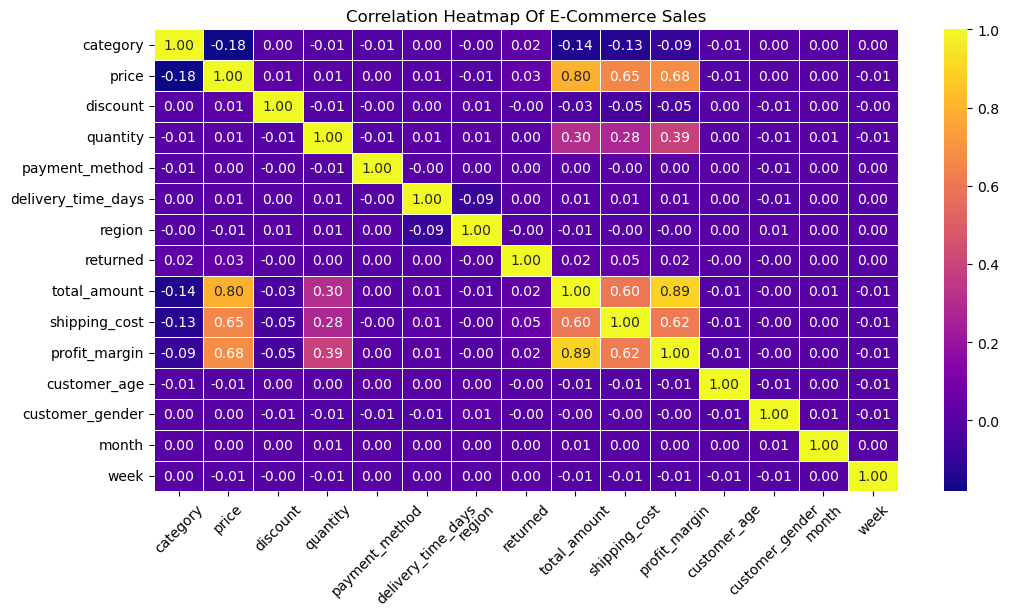

In [94]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap='plasma', fmt='.2f', linewidth=0.5)
plt.title('Correlation Heatmap Of E-Commerce Sales')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### 1. Train Test Split

In [84]:
features = ['price', 'discount', 'quantity','payment_method', 'delivery_time_days', 'region', 'total_amount', 'shipping_cost', 'profit_margin', 'customer_age', 'customer_gender', 'month', 'week']
target = 'returned'

X = df[features]
y = df[target]

#### Scale The Inputs

In [86]:
scaler = StandardScaler()

In [87]:
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.22844753,  1.44089138, -0.52638365, ..., -0.96610585,
         1.58235987,  1.51189912],
       [-0.48391153, -0.70523618, -0.52638365, ...,  0.78316736,
        -0.73928363,  0.50747942],
       [ 0.28723569,  0.01013968, -0.52638365, ...,  0.78316736,
         1.00194899, -0.49694029],
       ...,
       [ 1.04412039, -0.70523618,  3.76428051, ..., -0.96610585,
        -1.31969451,  1.51189912],
       [-0.49229523,  0.01013968, -0.52638365, ..., -0.96610585,
        -1.02948907,  0.00526956],
       [-0.21752451, -0.70523618, -0.52638365, ...,  0.78316736,
         0.71174356,  0.50747942]])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(27600, 13) (6900, 13)


### 2. Models

In [89]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decison Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

In [90]:
best_model = None
best_accuracy = 0
best_model_name = ''

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n {name} Accuracy: {accuracy}')


 Logistic Regression Accuracy: 0.9476811594202899

 Decison Tree Accuracy: 0.883768115942029

 Random Forest Accuracy: 0.9476811594202899

 Gradient Boosting Accuracy: 0.947536231884058

 K-Nearest Neighbors Accuracy: 0.946376811594203

 Support Vector Machine Accuracy: 0.9476811594202899


#### Best Model

In [91]:
if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model = model
    best_model_name = name
    print(f'\n Best Model: {best_model_name} with Accuracy: {best_accuracy}')


 Best Model: Support Vector Machine with Accuracy: 0.9476811594202899


### 3. Classification Report

In [92]:
y_pred_best = best_model.predict(X_test)
print(f'\n Classification Report: \n', classification_report(y_test, y_pred_best))


 Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      6539
           1       0.00      0.00      0.00       361

    accuracy                           0.95      6900
   macro avg       0.47      0.50      0.49      6900
weighted avg       0.90      0.95      0.92      6900



### 4. Confusion Matrix

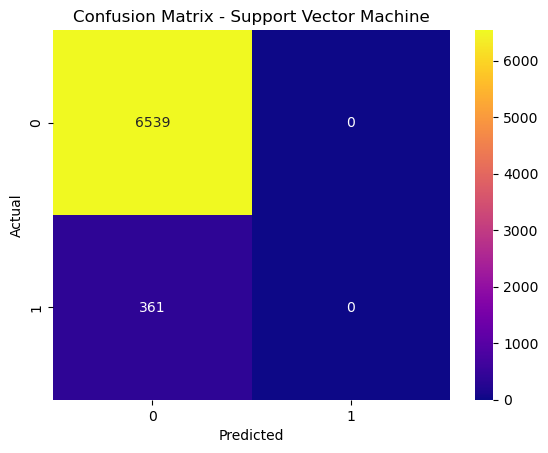

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()